
# Campaign EDA Notebook


In [3]:

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:

# === Load Data ===
df = pd.read_csv(r'C:\Users\sayeem\Downloads\EID_2_SMS_ data file.csv')
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDtypes:\n", df.dtypes)
print("\nSample:")
display(df.head(10))


Shape: (33418, 11)

Columns: ['Mobile Number', 'Customer Name', 'Gift', 'Status', 'Article Number', 'Winner Date', 'Order Type', 'Gift Code', 'Shop Code', 'Offer', 'Product']

Dtypes:
 Mobile Number      int64
Customer Name     object
Gift              object
Status            object
Article Number     int64
Winner Date       object
Order Type        object
Gift Code         object
Shop Code         object
Offer             object
Product           object
dtype: object

Sample:


,Mobile Number,Customer Name,Gift,Status,Article Number,Winner Date,Order Type,Gift Code,Shop Code,Offer,Product
0,1911786484,sajjad hussain,2.00%,success,13367,2025-06-30 23:59:31,offline,ETJ426844,HSJ,Hire purchase,lg
1,1717021221,sajjad hussain,6.00%,success,13367,2025-06-30 23:56:14,offline,EMJ938236,HSJ,DP Cash,lg
2,1843484781,Hasina Akter,2.00%,success,13247,2025-06-30 23:42:09,offline,ETJ795398,maz,Hire purchase,lg
3,1843484781,Hasina Akter,2.00%,success,13247,2025-06-30 23:41:08,offline,ETJ853886,maz,Hire purchase,lg
4,1712542656,Ekramul Islam,6.00%,success,12523,2025-06-30 23:31:02,offline,EMJ585785,DST,DP Cash,lg
5,1812881884,Mr. Sayen,3.50%,success,13534,2025-06-30 23:18:57,offline,EMJ837898,DL075,dealer_new,lg
6,1676761111,Ad.Golam Sarwar,7.50%,success,12535,2025-06-30 23:05:08,offline,EMJ673977,DKT,DP Cash,lg
7,1975440033,GM NAHIDUZZAMAN,2.00%,success,12619,2025-06-30 23:00:40,offline,ETJ272678,MRD,Hire purchase,lg
8,1728703137,Mst. Rokeya Siddika,6.00%,success,12523,2025-06-30 22:55:30,offline,EMJ763435,pbr,DP Hire,lg
9,1811000961,Akash,4.50%,success,13488,2025-06-30 22:54:32,offline,EMJ467273,DL770,dealer_new,lg


In [6]:
# Standardize column names (strip/replace spaces)
df.columns = [c.strip().replace("\n", " ").replace("  ", " ") for c in df.columns]

In [28]:
# Convert Winner Date to datetime if present
if "Winner Date" in df.columns:
    df["Winner Date"] = pd.to_datetime(df["Winner Date"], errors="coerce")
    # Derive time parts
    df["date"] = df["Winner Date"].dt.date
    df["year"] = df["Winner Date"].dt.year
    df["month_dt"] = pd.to_datetime(df["month"], format="%Y-%m")
    df["week"] = df["Winner Date"].dt.to_period("W").astype(str)
    df["dow"] = df["Winner Date"].dt.dayofweek  # 0=Mon, 6=Sun
    df["hour"] = df["Winner Date"].dt.hour

In [29]:
# Parse Gift as numeric percent if present (e.g., '2.00%')
def parse_gift(v):
    if pd.isna(v):
        return np.nan
    s = str(v).strip()
    s = s.replace("%", "")
    try:
        return float(s)
    except:
        return np.nan

if "Gift" in df.columns:
    df["Gift_pct"] = df["Gift"].apply(parse_gift)

In [30]:
# Clean Product text
if "Product" in df.columns:
    df["Product"] = df["Product"].astype(str).str.strip().replace({"nan": np.nan})
    df["Product_filled"] = df["Product"].fillna("Unknown")

In [31]:
# Normalize categorical text columns if present
for col in ["Offer", "Order Type", "Status", "Shop Code"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower().replace({"nan": np.nan})

# Ensure ids are strings
for col in ["Gift Code", "Article Number", "Mobile Number"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

print("Null counts after parsing:")
display(df.isnull().sum())

Null counts after parsing:


Mobile Number        0
Customer Name        0
Gift                 0
Status               0
Article Number       0
Winner Date          0
Order Type           0
Gift Code            0
Shop Code            0
Offer                0
Product             59
date                 0
year                 0
month                0
week                 0
dow                  0
hour                 0
Gift_pct          1047
Product_filled       0
month_dt             0
dtype: int64

In [32]:
df.head(5)

,Mobile Number,Customer Name,Gift,Status,Article Number,Winner Date,Order Type,Gift Code,Shop Code,Offer,Product,date,year,month,week,dow,hour,Gift_pct,Product_filled,month_dt
0,1911786484,sajjad hussain,2.00%,success,13367,2025-06-30 23:59:31,offline,ETJ426844,hsj,hire purchase,lg,2025-06-30,2025,2025-06,2025-06-30/2025-07-06,0,23,2.0,lg,2025-06-01
1,1717021221,sajjad hussain,6.00%,success,13367,2025-06-30 23:56:14,offline,EMJ938236,hsj,dp cash,lg,2025-06-30,2025,2025-06,2025-06-30/2025-07-06,0,23,6.0,lg,2025-06-01
2,1843484781,Hasina Akter,2.00%,success,13247,2025-06-30 23:42:09,offline,ETJ795398,maz,hire purchase,lg,2025-06-30,2025,2025-06,2025-06-30/2025-07-06,0,23,2.0,lg,2025-06-01
3,1843484781,Hasina Akter,2.00%,success,13247,2025-06-30 23:41:08,offline,ETJ853886,maz,hire purchase,lg,2025-06-30,2025,2025-06,2025-06-30/2025-07-06,0,23,2.0,lg,2025-06-01
4,1712542656,Ekramul Islam,6.00%,success,12523,2025-06-30 23:31:02,offline,EMJ585785,dst,dp cash,lg,2025-06-30,2025,2025-06,2025-06-30/2025-07-06,0,23,6.0,lg,2025-06-01


In [19]:

# === Descriptive Summaries ===
def nunique_safe(col):
    return df[col].nunique() if col in df.columns else np.nan

summary = {
    "rows": len(df),
    "cols": df.shape[1],
    "unique_customers": nunique_safe("Mobile Number"),
    "unique_gift_codes": nunique_safe("Gift Code"),
    "unique_shops": nunique_safe("Shop Code"),
    "unique_offers": nunique_safe("Offer"),
    "unique_products": nunique_safe("Product_filled"),
    "date_min": pd.to_datetime(df["Winner Date"]).min() if "Winner Date" in df.columns else None,
    "date_max": pd.to_datetime(df["Winner Date"]).max() if "Winner Date" in df.columns else None,
    "gift_pct_min": df["Gift_pct"].min() if "Gift_pct" in df.columns else None,
    "gift_pct_max": df["Gift_pct"].max() if "Gift_pct" in df.columns else None,
    "gift_pct_mean": df["Gift_pct"].mean() if "Gift_pct" in df.columns else None,
}
summary_df = pd.DataFrame([summary]).T.rename(columns={0:"value"})
display(summary_df)


,value
rows,33418
cols,19
unique_customers,28104
unique_gift_codes,33417
unique_shops,320
unique_offers,10
unique_products,3
date_min,2025-04-21 14:30:28
date_max,2025-06-30 23:59:31
gift_pct_min,2.0


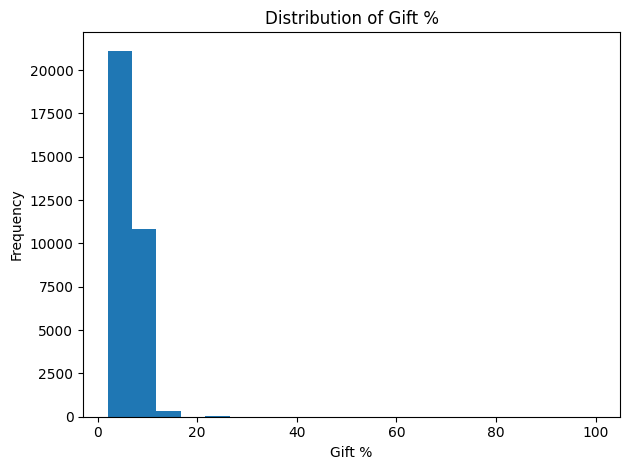

In [23]:
# === Distribution: Gift % ===
if "Gift_pct" in df.columns:
    plt.figure()
    df["Gift_pct"].dropna().plot(kind="hist", bins=20, title="Distribution of Gift %")
    plt.xlabel("Gift %")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

,count
Offer,
hire purchase,15459
cash purchase,14568
free gift portion,1046
bank emi,1004
dealer_new,662
dp cash,382
orange club,141
dp hire,109
gp star,37


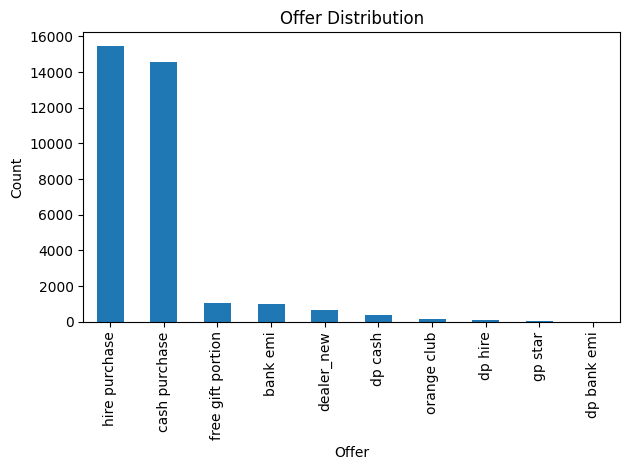

In [24]:

# Offer distribution
if "Offer" in df.columns:
    offer_counts = df["Offer"].value_counts(dropna=False)
    display(offer_counts.to_frame("count"))
    plt.figure()
    offer_counts.plot(kind="bar", title="Offer Distribution")
    plt.xlabel("Offer")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

,date,count
0,2025-04-21,204
1,2025-04-22,313
2,2025-04-23,303
3,2025-04-24,368
4,2025-04-25,187


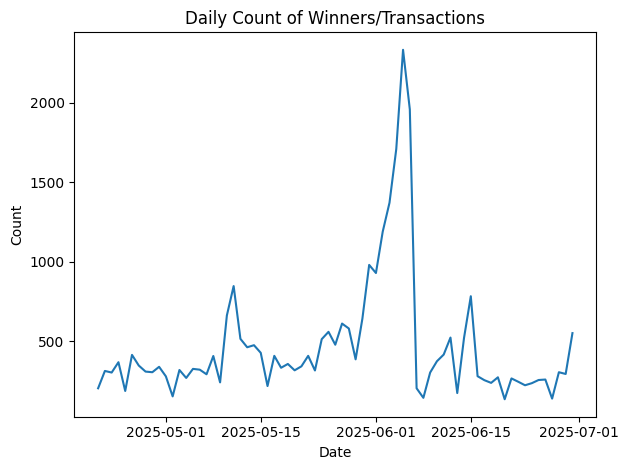

In [26]:

# === Time Series Trends ===
if "date" in df.columns:
    daily = df.groupby("date").size().rename("count").reset_index()
    display(daily.head())

    plt.figure()
    plt.plot(pd.to_datetime(daily["date"]), daily["count"])
    plt.title("Daily Count of Winners/Transactions")
    plt.xlabel("Date")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

,month,count
0,2025-04-01,3089
1,2025-05-01,13443
2,2025-06-01,16886


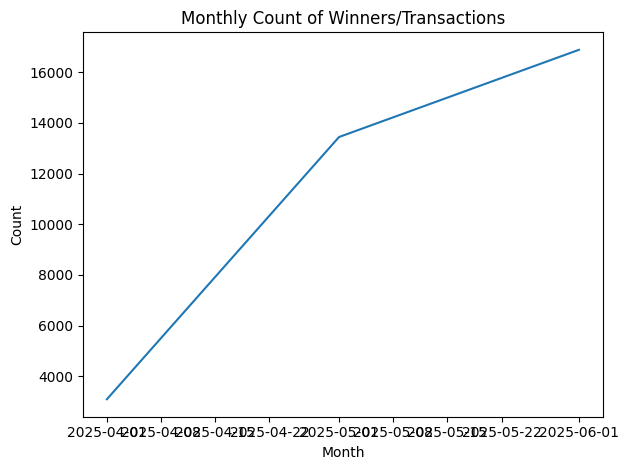

In [33]:
if "month" in df.columns:
    monthly = df.groupby("month").size().rename("count").reset_index()
    monthly["month"] = pd.to_datetime(monthly["month"] + "-01", errors="coerce")
    monthly = monthly.sort_values("month")
    display(monthly.head())

    plt.figure()
    plt.plot(monthly["month"], monthly["count"])
    plt.title("Monthly Count of Winners/Transactions")
    plt.xlabel("Month")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

,value
Shop Code,
lkm,477
bgr,476
kta,421
jbp,399
cma,391
brl,390
cpr,334
svn,330
bbg,321


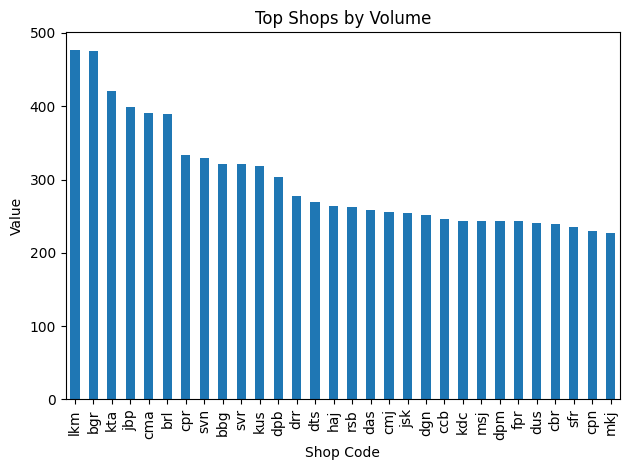

,value
Offer,
dp cash,7.583770
cash purchase,7.471341
dealer_new,4.910876
dp hire,3.311927
hire purchase,3.247138
bank emi,2.871884
dp bank emi,2.300000
gp star,2.000000
orange club,2.000000


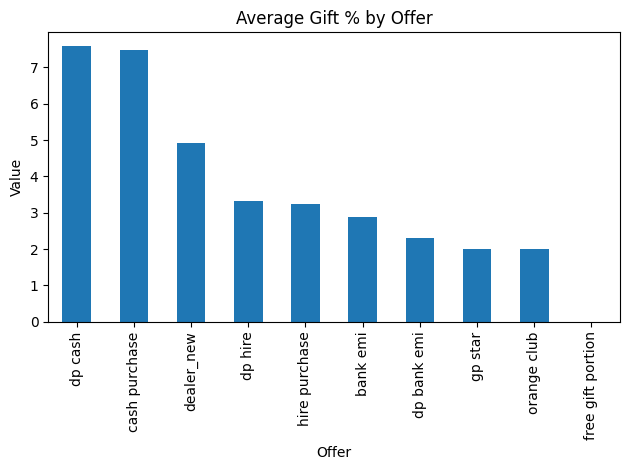

,value
Shop Code,
com,10.097973
kdl,10.008772
dl031,9.875000
jkp,7.733333
kda,7.442029
kks,7.375000
cpr,6.996942
lkm,6.890985
dns,6.654639


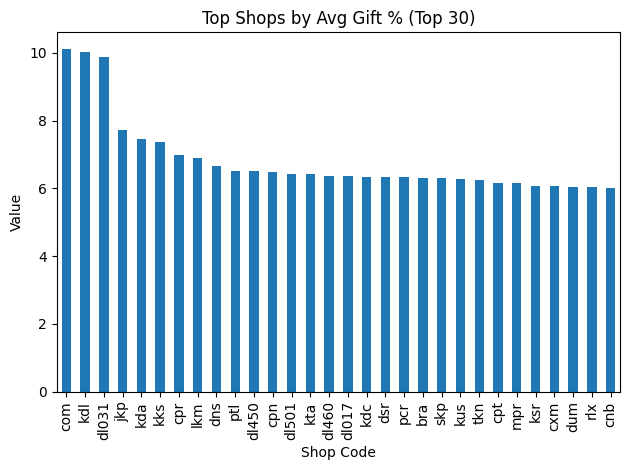

,value
Article Number,
12754,12.250000
12214,10.000000
12296,10.000000
11988,10.000000
12340,10.000000
11559,10.000000
12325,10.000000
12580,10.000000
11088,10.000000


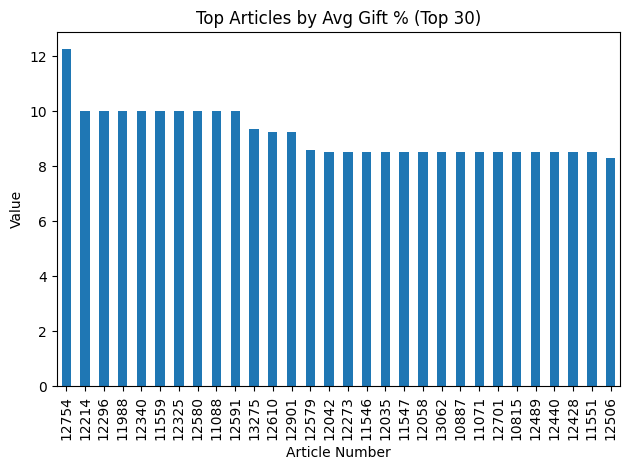

Offer,bank emi,cash purchase,dealer_new,dp bank emi,dp cash,dp hire,free gift portion,gp star,hire purchase,orange club
month,,,,,,,,,,
2025-04-01,100,1233,13,2,60,17,187,0,1464,13
2025-05-01,419,5671,66,4,153,44,498,12,6513,63
2025-06-01,485,7664,583,4,169,48,361,25,7482,65


In [44]:
# === Segment Comparisons ===
def barplot_series(series, title, xlabel, filename):
    s = series.sort_values(ascending=False)
    display(s.to_frame("value").head(20))
    plt.figure()
    s.head(30).plot(kind="bar", title=title)
    plt.xlabel(xlabel)
    plt.ylabel("Value")
    plt.tight_layout()
    plt.show()

# Shop performance by volume
if "Shop Code" in df.columns:
    shop_counts = df["Shop Code"].value_counts()
    barplot_series(shop_counts, "Top Shops by Volume", "Shop Code", "shops_volume.png")

# Average Gift % by Offer
if "Gift_pct" in df.columns and "Offer" in df.columns:
    g_offer = df.groupby("Offer")["Gift_pct"].mean().sort_values(ascending=False)
    barplot_series(g_offer, "Average Gift % by Offer", "Offer", "avg_gift_by_offer.png")

# Average Gift % by Shop
if "Gift_pct" in df.columns and "Shop Code" in df.columns:
    g_shop = df.groupby("Shop Code")["Gift_pct"].mean().sort_values(ascending=False)
    barplot_series(g_shop.head(30), "Top Shops by Avg Gift % (Top 30)", "Shop Code", "avg_gift_by_shop_top30.png")

# Average Gift % by Article Number (replacing Product_filled)
if "Gift_pct" in df.columns and "Article Number" in df.columns:
    g_article = df.groupby("Article Number")["Gift_pct"].mean().sort_values(ascending=False)
    barplot_series(g_article.head(30), "Top Articles by Avg Gift % (Top 30)", "Article Number", "avg_gift_by_article_top30.png")

# Offer mix over time (monthly)
if "month" in df.columns and "Offer" in df.columns:
    mix = df.pivot_table(index="month", columns="Offer", values="Gift Code", aggfunc="count", fill_value=0)
    mix.index = pd.to_datetime(mix.index + "-01", errors="coerce")
    mix = mix.sort_index()
    display(mix.tail())


Gift % IQR bounds: [-2.50, 13.50]
Number of Gift % outliers: 34
Unique customers with outlier Gift %: 29


,Mobile Number,Customer Name,Gift_pct,Article Number,Offer,Shop Code
28238,1314342297,Fahim,100.0,13275,hire purchase,com
24892,1837703160,Rayhan,100.0,13284,cash purchase,com
31209,1727991566,MD. ROBIUL ISLAM,100.0,13831,hire purchase,kda
29304,1700802304,Towfique Morshed,100.0,13490,cash purchase,dam
29279,1717534450,RAJIBUL,75.0,13277,hire purchase,jkp
17945,1789008930,RUBEL,75.0,13278,cash purchase,cxm
25479,1750928533,Ahmed Hossen,75.0,13276,cash purchase,lkm
33342,1712355644,Sohidul,75.0,12514,hire purchase,com
25986,1314342297,Sarwar,75.0,13281,hire purchase,com
20276,1689926326,rahat,75.0,13275,cash purchase,kdl


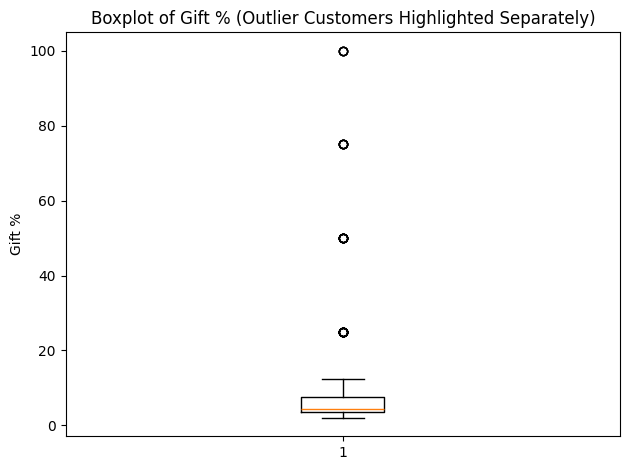

In [46]:

# === Outlier Customers: Gift % ===
if "Gift_pct" in df.columns and "Mobile Number" in df.columns:
    q1 = df["Gift_pct"].quantile(0.25)
    q3 = df["Gift_pct"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # Identify outlier rows
    outliers = df[(df["Gift_pct"] < lower) | (df["Gift_pct"] > upper)]

    # Get unique customers involved in outliers
    outlier_customers = outliers["Mobile Number"].unique()
    print(f"Gift % IQR bounds: [{lower:.2f}, {upper:.2f}]")
    print(f"Number of Gift % outliers: {len(outliers)}")
    print(f"Unique customers with outlier Gift %: {len(outlier_customers)}")

    # Display details of those customers and their Gift % values
    display(outliers[["Mobile Number", "Customer Name", "Gift_pct", "Article Number", "Offer", "Shop Code"]]
            .sort_values("Gift_pct", ascending=False)
            .head(20))

    # Visualize Gift % boxplot
    plt.figure()
    plt.boxplot(df["Gift_pct"].dropna(), vert=True)
    plt.title("Boxplot of Gift % (Outlier Customers Highlighted Separately)")
    plt.ylabel("Gift %")
    plt.tight_layout()
    plt.show()


Normal Avg Gift % upper bound: 13.50
Normal Transaction Count upper bound: 1
Outliers by High Gift %: 27
Outliers by High Transactions: 3391
Total Unique Outlier Customers: 3408


,Mobile Number,Transactions,Avg_Gift_pct,Max_Gift_pct,Min_Gift_pct
4265,1689926326,1,75.000000,75.0,75.0
10222,1717534450,1,75.000000,75.0,75.0
16490,1750928533,1,75.000000,75.0,75.0
19740,1789008930,1,75.000000,75.0,75.0
4304,1700802304,2,54.250000,100.0,8.5
13379,1727991566,2,52.250000,100.0,4.5
174,1303267221,1,50.000000,50.0,50.0
6443,1711964492,1,50.000000,50.0,50.0
14203,1732855841,1,50.000000,50.0,50.0
14247,1733157941,1,50.000000,50.0,50.0


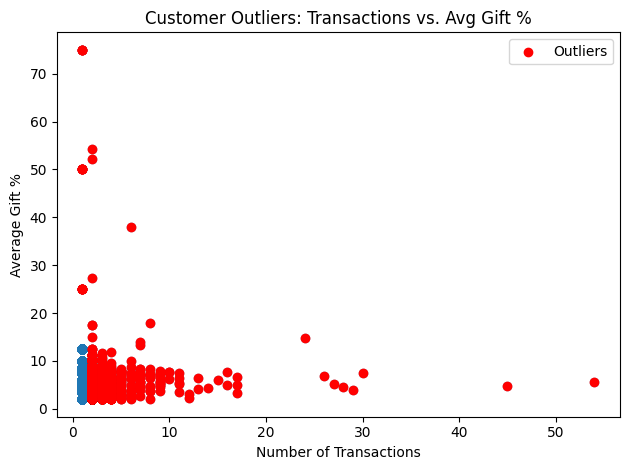

In [48]:
# === Outlier Customers by Discount & Transaction Volume ===
if "Gift_pct" in df.columns and "Mobile Number" in df.columns:
    # Step 1: Group by customer
    cust_summary = df.groupby("Mobile Number")["Gift_pct"].agg(
        ["count", "mean", "max", "min"]
    ).reset_index().rename(
        columns={
            "count": "Transactions",
            "mean": "Avg_Gift_pct",
            "max": "Max_Gift_pct",
            "min": "Min_Gift_pct",
        }
    )

    # Step 2: IQR for average discount
    q1_gift = cust_summary["Avg_Gift_pct"].quantile(0.25)
    q3_gift = cust_summary["Avg_Gift_pct"].quantile(0.75)
    iqr_gift = q3_gift - q1_gift
    upper_gift = q3_gift + 1.5 * iqr_gift

    # Step 3: IQR for transaction count
    q1_tx = cust_summary["Transactions"].quantile(0.25)
    q3_tx = cust_summary["Transactions"].quantile(0.75)
    iqr_tx = q3_tx - q1_tx
    upper_tx = q3_tx + 1.5 * iqr_tx

    # Step 4: Find outliers
    outlier_high_gift = cust_summary[cust_summary["Avg_Gift_pct"] > upper_gift]
    outlier_high_tx = cust_summary[cust_summary["Transactions"] > upper_tx]

    # Step 5: Combine both
    combined_outliers = pd.concat([outlier_high_gift, outlier_high_tx]).drop_duplicates(subset=["Mobile Number"])

    # Step 6: Print summary
    print(f"Normal Avg Gift % upper bound: {upper_gift:.2f}")
    print(f"Normal Transaction Count upper bound: {upper_tx:.0f}")
    print(f"Outliers by High Gift %: {len(outlier_high_gift)}")
    print(f"Outliers by High Transactions: {len(outlier_high_tx)}")
    print(f"Total Unique Outlier Customers: {len(combined_outliers)}")

    # Step 7: Display top unusual customers
    display(
        combined_outliers.sort_values(["Avg_Gift_pct", "Transactions"], ascending=False).head(20)
    )
    # Step 9: Visualization
    plt.figure()
    plt.scatter(cust_summary["Transactions"], cust_summary["Avg_Gift_pct"], alpha=0.5)
    plt.scatter(
        combined_outliers["Transactions"],
        combined_outliers["Avg_Gift_pct"],
        color="red",
        label="Outliers"
    )
    plt.title("Customer Outliers: Transactions vs. Avg Gift %")
    plt.xlabel("Number of Transactions")
    plt.ylabel("Average Gift %")
    plt.legend()
    plt.tight_layout()
    plt.show()

,wins_per_customer_stats
count,28104.000000
mean,1.189083
std,0.863309
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,54.000000


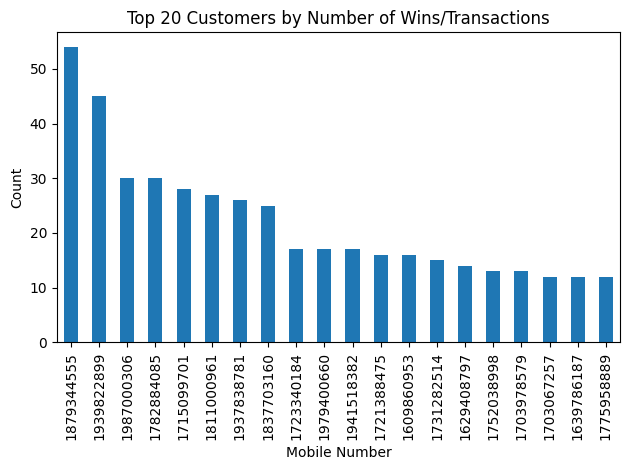

In [43]:

# ===Customer-Level Analysis ===
if "Mobile Number" in df.columns:
    cust_counts = df["Mobile Number"].value_counts()
    display(cust_counts.describe().to_frame("wins_per_customer_stats"))

    # Top repeat customers
    top_cust = cust_counts.head(20)
    plt.figure()
    top_cust.plot(kind="bar", title="Top 20 Customers by Number of Wins/Transactions")
    plt.xlabel("Mobile Number")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


,Sales Count
Article Number,
13277,1538
12515,1513
13825,1327
13831,973
13833,944
13490,861
12513,828
12514,811
13245,670


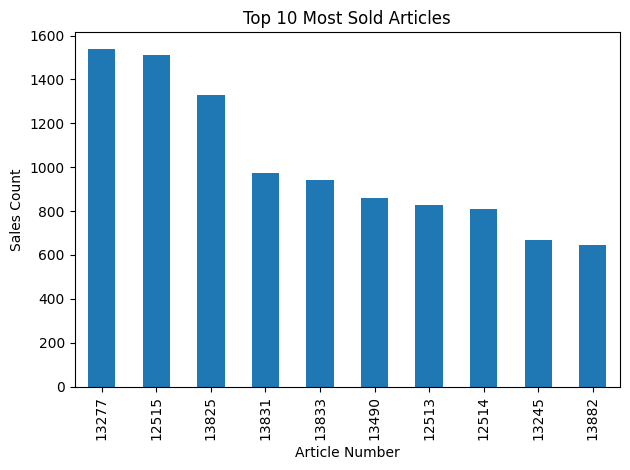

In [45]:
if "Article Number" in df.columns:
    article_sales = df["Article Number"].value_counts().head(10)
    display(article_sales.to_frame("Sales Count"))

    # Optional: visualize
    plt.figure()
    article_sales.plot(kind="bar", title="Top 10 Most Sold Articles")
    plt.xlabel("Article Number")
    plt.ylabel("Sales Count")
    plt.tight_layout()
    plt.show()